In [1]:
## Preloads
using Statistics
using FFTW
using Plots
using BenchmarkTools
using Profile
using LinearAlgebra
using Measures
using HDF5
using Plots
push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
using DHC_2DUtils
using MLDatasets
using Images
using HDF5
theme(:juno)

Let me just play with EMNIST today.

In [2]:
# read the MNIST training data, x=image, y=class
train_x, train_y = MNIST.traindata();
test_x, test_y   = MNIST.testdata();

In [4]:
using Pkg
Pkg.add("MAT")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [23992714] + MAT v0.9.2
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using MAT

In [3]:
EMNIST = matread("/Users/saydjari/Dropbox/GradSchool_AKS/Doug/ExtData/EMNIST/emnist-letters.mat")

Dict{String,Any} with 1 entry:
  "dataset" => Dict{String,Any}("test"=>Dict{String,Any}("images"=>UInt8[0x00 0…

In [35]:
EMNIST["dataset"]

Dict{String,Any} with 3 entries:
  "test"    => Dict{String,Any}("images"=>UInt8[0x00 0x00 … 0x00 0x00; 0x00 0x0…
  "mapping" => [1.0 65.0 97.0; 2.0 66.0 98.0; … ; 25.0 89.0 121.0; 26.0 90.0 12…
  "train"   => Dict{String,Any}("images"=>UInt8[0x00 0x00 … 0x00 0x00; 0x00 0x0…

In [36]:
EMNIST["dataset"]["test"]

Dict{String,Any} with 3 entries:
  "images"  => UInt8[0x00 0x00 … 0x00 0x00; 0x00 0x00 … 0x00 0x00; … ; 0x00 0x0…
  "labels"  => [1.0; 1.0; … ; 26.0; 26.0]
  "writers" => [3259.0; 3984.0; … ; 3407.0; 1301.0]

In [37]:
EMNIST["dataset"]["train"]

Dict{String,Any} with 3 entries:
  "images"  => UInt8[0x00 0x00 … 0x00 0x00; 0x00 0x00 … 0x00 0x00; … ; 0x00 0x0…
  "labels"  => [23.0; 7.0; … ; 15.0; 19.0]
  "writers" => [1234.0; 799.0; … ; 208.0; 875.0]

In [38]:
EMNIST["dataset"]["test"]["images"]

20800×784 Array{UInt8,2}:
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00

In [39]:
EMNIST["dataset"]["train"]["images"]

124800×784 Array{UInt8,2}:
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x0

In [4]:
train_letters_x = reshape(EMNIST["dataset"]["train"]["images"],:,28,28);
test_letters_x = reshape(EMNIST["dataset"]["test"]["images"],:,28,28);

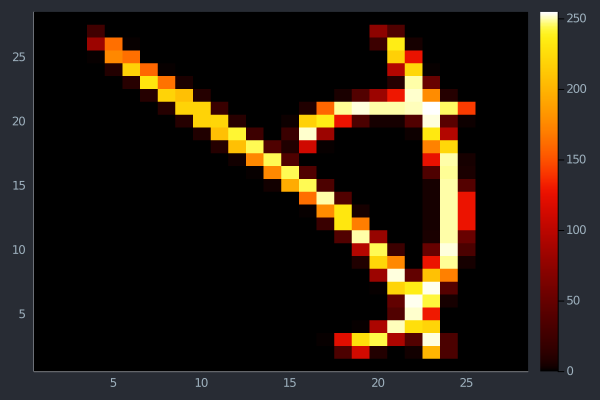

In [61]:
heatmap(train_letters_x[602,:,:])

In [10]:
function mnist_pad(im; θ=0.0)
        impad = zeros(Float64,64,64)
        impad[46:-1:19,19:46] = im
        imbig = imresize(impad,(128,128))
    if θ != 0.0
        imrot = imrotate(imbig, θ, axes(imbig))
        imrot[findall(imrot .!= imrot)] .= 0.0
        return imrot
    end
    return imbig
end

mnist_pad (generic function with 1 method)

In [11]:
heatmap(mnist_pad(lst_train[207],θ=0))
savefig("../images/EMNIST_ex.png")

In [74]:
size(train_letters_x)[1]

124800

In [5]:
lst_train = Array{Any}(undef, 0)
for i = 1:size(train_letters_x)[1]
    push!(lst_train,train_letters_x[i,:,:])
end

lst_test = Array{Any}(undef, 0)
for i = 1:size(test_letters_x)[1]
    push!(lst_test,test_letters_x[i,:,:])
end

In [3]:
using Distributed

In [4]:
addprocs(7);

In [86]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function mnist_pad(im; θ=0.0)
        impad = zeros(Float64,64,64)
        impad[46:-1:19,19:46] = im
        imbig = imresize(impad,(128,128))
        if θ != 0.0
            imrot = imrotate(imbig, θ, axes(imbig), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot
        end
        return imbig
    end
    
    function mnist_DHC(x)
        image    = mnist_pad(x[:,:], θ=0.0)
        WST = DHC_compute(image, filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, lst_test)
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/emnist_letters_test.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 0:04:17m


In [87]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function mnist_pad(im; θ=0.0)
        impad = zeros(Float64,64,64)
        impad[46:-1:19,19:46] = im
        imbig = imresize(impad,(128,128))
        if θ != 0.0
            imrot = imrotate(imbig, θ, axes(imbig), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot
        end
        return imbig
    end
    
    function mnist_DHC(x)
        image    = mnist_pad(x[:,:], θ=0.0)
        WST = DHC_compute(image, filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, lst_train)
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/emnist_letters_train.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 0:25:51m


In [88]:
EMNIST = matread("/Users/saydjari/Dropbox/GradSchool_AKS/Doug/ExtData/EMNIST/emnist-balanced.mat")

train_letters_x = reshape(EMNIST["dataset"]["train"]["images"],:,28,28);
test_letters_x = reshape(EMNIST["dataset"]["test"]["images"],:,28,28);

lst_train = Array{Any}(undef, 0)
for i = 1:size(train_letters_x)[1]
    push!(lst_train,train_letters_x[i,:,:])
end

lst_test = Array{Any}(undef, 0)
for i = 1:size(test_letters_x)[1]
    push!(lst_test,test_letters_x[i,:,:])
end

In [89]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function mnist_pad(im; θ=0.0)
        impad = zeros(Float64,64,64)
        impad[46:-1:19,19:46] = im
        imbig = imresize(impad,(128,128))
        if θ != 0.0
            imrot = imrotate(imbig, θ, axes(imbig), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot
        end
        return imbig
    end
    
    function mnist_DHC(x)
        image    = mnist_pad(x[:,:], θ=0.0)
        WST = DHC_compute(image, filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, lst_test)
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/emnist_balanced_test.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:43


In [90]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function mnist_pad(im; θ=0.0)
        impad = zeros(Float64,64,64)
        impad[46:-1:19,19:46] = im
        imbig = imresize(impad,(128,128))
        if θ != 0.0
            imrot = imrotate(imbig, θ, axes(imbig), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot
        end
        return imbig
    end
    
    function mnist_DHC(x)
        image    = mnist_pad(x[:,:], θ=0.0)
        WST = DHC_compute(image, filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, lst_train)
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/emnist_balanced_train.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 0:22:37


In [91]:
EMNIST = matread("/Users/saydjari/Dropbox/GradSchool_AKS/Doug/ExtData/EMNIST/emnist-digits.mat")

train_letters_x = reshape(EMNIST["dataset"]["train"]["images"],:,28,28);
test_letters_x = reshape(EMNIST["dataset"]["test"]["images"],:,28,28);

lst_train = Array{Any}(undef, 0)
for i = 1:size(train_letters_x)[1]
    push!(lst_train,train_letters_x[i,:,:])
end

lst_test = Array{Any}(undef, 0)
for i = 1:size(test_letters_x)[1]
    push!(lst_test,test_letters_x[i,:,:])
end

In [92]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function mnist_pad(im; θ=0.0)
        impad = zeros(Float64,64,64)
        impad[46:-1:19,19:46] = im
        imbig = imresize(impad,(128,128))
        if θ != 0.0
            imrot = imrotate(imbig, θ, axes(imbig), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot
        end
        return imbig
    end
    
    function mnist_DHC(x)
        image    = mnist_pad(x[:,:], θ=0.0)
        WST = DHC_compute(image, filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, lst_test)
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/emnist_digits_test.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 0:07:59


In [93]:
@everywhere begin
    using Statistics
    using LinearAlgebra
    using Distributed
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using Images
    using Interpolations
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    
    function mnist_pad(im; θ=0.0)
        impad = zeros(Float64,64,64)
        impad[46:-1:19,19:46] = im
        imbig = imresize(impad,(128,128))
        if θ != 0.0
            imrot = imrotate(imbig, θ, axes(imbig), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot
        end
        return imbig
    end
    
    function mnist_DHC(x)
        image    = mnist_pad(x[:,:], θ=0.0)
        WST = DHC_compute(image, filter_hash)
        return WST
    end
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, lst_train)
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/emnist_digits_train.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 0:51:13m


Back to MNIST for simple wd and theta_shift tests

In [5]:
workers()

7-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8

In [6]:
# read the MNIST training data, x=image, y=class
train_x, train_y = MNIST.traindata();
test_x, test_y   = MNIST.testdata();

In [7]:
lst = Array{Any}(undef, 0)
for i = 1:60000
    push!(lst,train_x[:,:,i])
end

lst_test = Array{Any}(undef, 0)
for i = 1:10000
    push!(lst_test,test_x[:,:,i])
end

In [8]:
M = 100
angle_array = []
for i = 2π/M:2π/M:2π
    append!(angle_array,i)
end

In [9]:
M = 100
train_angles = [2π/M,π/3,2π/3,3π/3,4π/3,5π/3];

In [102]:
@everywhere begin
    using Statistics
    using BenchmarkTools
    using LinearAlgebra
    using Distributed
    using ProgressMeter
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using MLDatasets
    using Images
    using Interpolations
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=1)
    
    function mnist_pad(im; θ=0.0)
        impad = zeros(Float64,64,64)
        impad[46:-1:19,19:46] = im'
        imbig = imresize(impad,(128,128))
        if θ != 0.0
            imrot = imrotate(imbig, θ, axes(imbig), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot
        end
        return imbig
    end
    
    function mnist_DHC(params)
        θ, x = params
        image    = mnist_pad(x[:,:], θ=θ)
        WST = DHC_compute(image, filter_hash)
        return WST
    end
    
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, Iterators.product(angle_array,lst_test))
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/mnist_DHC_test_ang_1_1_wd1.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 5:58:411:34


In [12]:
@everywhere begin
    using Statistics
    using BenchmarkTools
    using LinearAlgebra
    using Distributed
    using ProgressMeter
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using MLDatasets
    using Images
    using Interpolations
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=3)
    
    function mnist_pad(im; θ=0.0)
        impad = zeros(Float64,64,64)
        impad[46:-1:19,19:46] = im'
        imbig = imresize(impad,(128,128))
        if θ != 0.0
            imrot = imrotate(imbig, θ, axes(imbig), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot
        end
        return imbig
    end
    
    function mnist_DHC(params)
        θ, x = params
        image    = mnist_pad(x[:,:], θ=θ)
        WST = DHC_compute(image, filter_hash, filter_hash)
        return WST
    end
    
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, Iterators.product(angle_array,lst_test))
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/mnist_DHC_test_ang_1_1_wd3.h5", "main/data", mnist_DHC_out)

Progress:   0%|                                         |  ETA: 2 days, 21:08:34

LoadError: InterruptException:
rehash! at ./iddict.jl:57 [inlined]
sizehint! at ./iddict.jl:68 [inlined]
deserialize_array(::Distributed.ClusterSerializer{Sockets.TCPSocket}) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:1144
handle_deserialize(::Distributed.ClusterSerializer{Sockets.TCPSocket}, ::Int32) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:824
deserialize at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:773 [inlined]
deserialize_msg(::Distributed.ClusterSerializer{Sockets.TCPSocket}) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Distributed/src/messages.jl:99
#invokelatest#1 at ./essentials.jl:710 [inlined]
invokelatest at ./essentials.jl:709 [inlined]
message_handler_loop(::Sockets.TCPSocket, ::Sockets.TCPSocket, ::Bool) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Distributed/src/process_messages.jl:185
process_tcp_streams(::Sockets.TCPSocket, ::Sockets.TCPSocket, ::Bool) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Distributed/src/process_messages.jl:142
(::Distributed.var"#99#100"{Sockets.TCPSocket,Sockets.TCPSocket,Bool})() at ./task.jl:356

In [11]:
@everywhere begin
    using Statistics
    using BenchmarkTools
    using LinearAlgebra
    using Distributed
    using ProgressMeter
    push!(LOAD_PATH, "/Users/saydjari/Dropbox/GradSchool_AKS/Doug/Projects/DHC/main/")
    using DHC_2DUtils
    using FFTW
    using MLDatasets
    using Images
    using Interpolations
    
    # filter bank
    filter_hash = fink_filter_hash(1,8,nx=128,wd=2)
    filter_hash2 = fink_filter_hash(1,8,nx=128,wd=2,shift=true)
    
    function mnist_pad(im; θ=0.0)
        impad = zeros(Float64,64,64)
        impad[46:-1:19,19:46] = im'
        imbig = imresize(impad,(128,128))
        if θ != 0.0
            imrot = imrotate(imbig, θ, axes(imbig), Cubic(Throw(OnGrid())))
            imrot[findall(imrot .!= imrot)] .= 0.0
            return imrot
        end
        return imbig
    end
    
    function mnist_DHC(params)
        θ, x = params
        image    = mnist_pad(x[:,:], θ=θ)
        WST = DHC_compute(image, filter_hash, filter_hash2)
        return WST
    end
    
end
 
mnist_DHC_out = @showprogress pmap(mnist_DHC, Iterators.product(angle_array,lst_test))
mnist_DHC_out = hcat(mnist_DHC_out...)

h5write("../scratch_AKS/mnist_DHC_test_ang_1_1_wd2_shift.h5", "main/data", mnist_DHC_out)

Progress: 100%|█████████████████████████████████████████| Time: 5:41:48m39m
